In [1]:
import yfinance as yf
import pandas as pd
# pip install yfinance
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime # convert timestamp and revese to string
%matplotlib inline
import quantstats as qs
import pandas_ta as ta
import math



# Down Load the SPY Data Frame

In [2]:
# While closing price merely refers to the cost of shares at the end of the day, 
#the adjusted closing price considers other factors like dividends, stock splits,
#and new stock offerings. Since the adjusted closing price begins where the closing price ends,
#it can be called a more accurate measure of stocks' value.
SPYadj=yf.download("SPY")
SPYadj

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334017,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514210,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568275,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838545,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946669,531500
...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200
2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900


# Download ACWX data

In [3]:
#https://etfdb.com/index/msci-all-country-world-index-ex-usa/
ACWXdf=yf.download("ACWX")
ACWXdf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-04-01,50.910000,51.360001,50.910000,51.360001,36.048756,1100
2008-04-02,51.849998,52.029999,51.849998,51.860001,36.399704,2000
2008-04-03,52.110001,52.360001,52.110001,52.320000,36.722569,1800
2008-04-04,57.549999,57.549999,52.259998,52.450001,36.813805,1700
2008-04-07,52.209999,52.709999,50.820000,52.709999,36.996296,800
...,...,...,...,...,...,...
2022-12-05,47.139999,47.200001,46.480000,46.570000,46.570000,3040500
2022-12-06,46.660000,46.759998,46.230000,46.380001,46.380001,1848800
2022-12-07,46.299999,46.480000,46.139999,46.299999,46.299999,2049400


In [4]:
#### try vs code for qsstats

# Data Validation

In [4]:
SPYadj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7522 entries, 1993-01-29 to 2022-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7522 non-null   float64
 1   High       7522 non-null   float64
 2   Low        7522 non-null   float64
 3   Close      7522 non-null   float64
 4   Adj Close  7522 non-null   float64
 5   Volume     7522 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 411.4 KB


In [5]:
# note after dropna() still 7518 row; 
SPYadj.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334017,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514210,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568275,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838545,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946669,531500
...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200
2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900


In [6]:
ACWXdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3702 entries, 2008-04-01 to 2022-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3702 non-null   float64
 1   High       3702 non-null   float64
 2   Low        3702 non-null   float64
 3   Close      3702 non-null   float64
 4   Adj Close  3702 non-null   float64
 5   Volume     3702 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 202.5 KB


In [7]:
# note still 3689 rows after
ACWXdf.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-04-01,50.910000,51.360001,50.910000,51.360001,36.048756,1100
2008-04-02,51.849998,52.029999,51.849998,51.860001,36.399704,2000
2008-04-03,52.110001,52.360001,52.110001,52.320000,36.722569,1800
2008-04-04,57.549999,57.549999,52.259998,52.450001,36.813805,1700
2008-04-07,52.209999,52.709999,50.820000,52.709999,36.996296,800
...,...,...,...,...,...,...
2022-12-05,47.139999,47.200001,46.480000,46.570000,46.570000,3040500
2022-12-06,46.660000,46.759998,46.230000,46.380001,46.380001,1848800
2022-12-07,46.299999,46.480000,46.139999,46.299999,46.299999,2049400


# Time Handler function()1

In [11]:
# from datetime import datetime, change time stamp to str
def dftimeStaptoString(df):
    df.index.strftime("%Y-%m-%d")
    return df

# Time Handler function()2

In [12]:
# cut the time frame/period for study needs; disimble timestamp to diff columns
def timeHandlerFC(df):
    df=df.assign(year=df.index.year, month=df.index.month,day=df.index.day)
    return df

# DataFrame Time Slicer

In [35]:
# study the index for and datetime libaray
def dataFrameYrselectionFC(df,time):
    df=df.loc[df.index>=time]
    return df

# Caculate rate of changes

# Caculate Return and Return distribution

In [8]:
# have math dependency due to math.celi()
#Kurtosis -peak and tail of the return distribution; normal distribution have Kurtosis near 0
#imperical data may be more peaky with fater tail
#Skewness # negative side tail is fatter than postive side; extrem negative movement more likely
def Caculate_ReturnFC(df):
    df['return%']=((df['Close']-df['Open'])/df['Open']*100).round(2)
    dfraw=df['return%'].copy()
    x=df['return%'].max()
    y=df['return%'].min()
    describe=df['return%'].describe()
    skewness=st.skew(df['return%'].dropna())
    kurtosiss=st.kurtosis(df['return%'].dropna())
    # notcie shapiro not effective if n>5000
    #shapiro is a fair estimate on probability wise, still not a gurantee judgement
    # will sample 5000 a good way to go?
    p_value=st.shapiro(df['return%'].dropna().sample(5000))[1]
    # in scipy it return excess kurtosis as defualt
    print(f"daily return excess kurtosis(after -3 from normal) at {kurtosiss}")
    print(f"daily return skewness at {skewness}")
    print(f"daily return p_value at {p_value}")
    if p_value<=0.05:
        print("Null hypothesis of normality is rejected.")
    else:
        print("Null hypothesis of normality is accepted.")
    L=np.arange(y,math.ceil(x),1)
    df['daily_%return_range']=pd.cut(df['return%'],bins=L)
    gp=df.groupby(['daily_%return_range']).count()['Close'].plot(kind='bar')
    df['return%']=(df['return%']).astype(str)+'%'
    df=df.drop(columns='daily_%return_range')
    
    # {"stdv":[1,2,3],"normal:[]"}

    dfraww=dfraw.to_frame()
    stdd=dfraww.std()
    meann=dfraww.mean()
    #normal distribution prama
    y=[0.6820,0.9540,0.99]
    Distr=[]
    for x in y:
        m=x*len(SPYadj)
        Distr.append(m)
    Distr

    upper1std=meann+stdd
    lower1std=meann-stdd
    upper2std=meann+(2*stdd)
    lower2std=meann-(2*stdd)
    upper3std=meann+(3*stdd)
    lower3std=meann-(3*stdd)
    Distrbin=[f"{round(lower1std[0],4)} ~{round(upper1std[0],4)}",\
              f"{round(lower2std[0],4)}~{round(upper2std[0],4)}",\
              f"{round(lower3std[0],4)}~{round(upper3std[0],4)}"]
    a1=len(dfraww.loc[(dfraww['return%']>lower2std[0] )& (dfraww['return%']<upper1std[0])])
    a2=len(dfraww.loc[(dfraww['return%']>lower2std [0])& (dfraww['return%']<upper2std[0])])
    a3=len(dfraww.loc[(dfraww['return%']>=lower2std[0] )& (dfraww['return%']<=upper3std[0])])
    actual=[]
    actual.append(a1)
    actual.append(a2)
    actual.append(a3)
    actual
    normalFreq=pd.DataFrame({'Distribin':Distrbin})
    normalFreq['Empirical']=actual
    normalFreq['Normal']=Distr
    normalFreq
    
    

    return df,gp,describe,normalFreq,dfraw
#we can unpack a4 for study 
# how can we create a normal distribution one to fit our data


daily return excess kurtosis(after -3 from normal) at 8.483105086789783
daily return skewness at -0.05750456430572144
daily return p_value at 4.203895392974451e-45
Null hypothesis of normality is rejected.


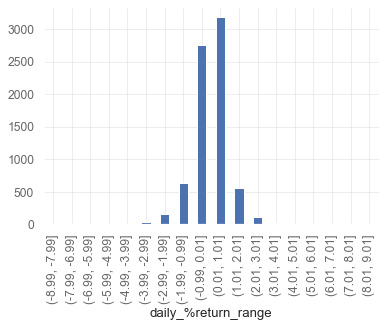

In [9]:
a1,a2,a3,a4,a5=Caculate_ReturnFC(SPYadj)

In [10]:
a1

,Open,High,Low,Close,Adj Close,Volume,return%
Date,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334017,1003200,-0.07%
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514210,480500,0.64%
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568275,201300,0.28%
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838545,529400,0.91%
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946669,531500,0.07%
...,...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08%
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.4%
2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06%


In [11]:
a3

count    7522.000000
mean        0.004291
std         0.974031
min        -8.990000
25%        -0.420000
50%         0.040000
75%         0.470000
max         9.300000
Name: return%, dtype: float64

In [12]:
# compare the number of occurange base on index:0->1sigma;
#index:1->2sigma
#index2->3 sigma
#we can notice how it is disobeyed among diff bins
a4

,Distribin,Empirical,Normal
0,-0.9697 ~0.9783,6522,5130.004
1,-1.9438~1.9524,7119,7175.988
2,-2.9178~2.9264,7238,7446.780


# Calculate ATR- Historical vol

In [13]:
# beautiful set up, it allow u to scope atr for realiize vol by anchor at today's date
def anchoredATRCalFC(df):
    df['TrueRange']=df['High']-df['Low']
    atrSpy=df.copy().ta.reverse.reset_index()
    rolling2D=[((atrSpy['TrueRange'][x]+atrSpy['TrueRange'][x+1])/2)/(atrSpy['Open'][x])for x in range(len(SPYadj)-1)]
    rolling2Draw=pd.Series(rolling2D)
    atrSpy['rolling2D']=(rolling2Draw*100).round(5).astype(str)+'%'
    
  #find out the atr change overtime from anchored date
    a={"years":["5days","20days","60days","1year","3year","5years","10years","20years","50years"]}
    b={"Days":[5,20,60,250,750,1250,2500,5000,12500]}
    c={"AvgDailyATRbaseonPeriod":[]}
    for x in b['Days']:
        #60period we need to add one digit; notice it start from 0 and exlude the last one on slicer,balance out
        periodmean=str(round((rolling2Draw[:x+1].mean()*100),3))+'%'
        c['AvgDailyATRbaseonPeriod'].append(periodmean)
    anchoredATR=pd.DataFrame({'years':a['years'],'Days':b['Days'],\
                              'AvgDailyATRbaseonPeriod':c['AvgDailyATRbaseonPeriod']}).T
    return atrSpy,rolling2Draw,anchoredATR

In [14]:
aatr,batr,catr=anchoredATRCalFC(SPYadj)
aatr

,Date,Open,High,Low,Close,Adj Close,Volume,return%,daily_%return_range,TrueRange,rolling2D
0,2022-12-09,394.940002,397.619995,393.149994,393.279999,393.279999,81367500,-0.42%,"(-0.99, 0.01]",4.470001,1.08371%
1,2022-12-08,395.140015,397.359985,393.269989,396.239990,396.239990,60737900,0.28%,"(0.01, 1.01]",4.089996,0.98193%
2,2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06%,"(0.01, 1.01]",3.670013,1.52949%
3,2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.4%,"(-1.99, -0.99]",8.349976,1.89149%
4,2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08%,"(-1.99, -0.99]",6.759979,1.54474%
...,...,...,...,...,...,...,...,...,...,...,...
7517,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946669,531500,0.07%,"(0.01, 1.01]",0.625000,1.21612%
7518,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838545,529400,0.91%,"(0.01, 1.01]",0.468750,0.80929%
7519,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568275,201300,0.28%,"(0.01, 1.01]",0.250000,0.60071%
7520,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514210,480500,0.64%,"(0.01, 1.01]",0.281250,0.56859%


In [15]:
# here we anchor at today's date and look back the historical data
# to see how daily vol high-low: trending; max lookback 50yrs
catr

,0,1,2,3,4,5,6,7,8
years,5days,20days,60days,1year,3year,5years,10years,20years,50years
Days,5,20,60,250,750,1250,2500,5000,12500
AvgDailyATRbaseonPeriod,1.399%,1.409%,1.912%,1.81%,1.535%,1.342%,1.097%,1.259%,1.314%


In [16]:
dftiwtter=pd.read_csv('sentimentresult.csv')
dftiwtter

,Unnamed: 0,username.1,name,day of publication,textclean,sentiment,helper
0,0,Degennaroinvest,Cataldo De gennaro,2022-11-09,rt saylor the prices may gyrate the players ma...,NEGATIVE,-1
1,1,Degennaroinvest,Cataldo De gennaro,2022-11-09,i believe everybody can make a small contribut...,POSITIVE,1
2,2,Degennaroinvest,Cataldo De gennaro,2022-11-09,httpstcosisqmkkajn\r\n\r\ngreat news for plug\...,POSITIVE,1
3,3,Degennaroinvest,Cataldo De gennaro,2022-11-09,rt plugpowerinc just got off bloomberg tv hig...,POSITIVE,1
4,4,Degennaroinvest,Cataldo De gennaro,2022-11-09,bionano genomics announces first publication u...,POSITIVE,1
...,...,...,...,...,...,...,...
6346,6346,federalreserve,Federal Reserve,2022-12-07,federalreserve invites public comment on propo...,POSITIVE,1
6347,6347,federalreserve,Federal Reserve,2022-12-07,approval of the application by farmers nationa...,NEGATIVE,-1
6348,6348,federalreserve,Federal Reserve,2022-12-07,federalreserve finalizes clarifying and techni...,NEGATIVE,-1
6349,6349,federalreserve,Federal Reserve,2022-12-07,having an issue with your bank did your credi...,NEGATIVE,-1


In [22]:
dfright=dftiwtter.groupby('day of publication').sum()['helper'].to_frame()
dfright=dfright.reset_index().rename(columns={"day of publication":"Date"})
dfright

,Date,helper
0,2022-07-03,-34
1,2022-07-07,-44
2,2022-07-12,-64
3,2022-07-26,-73
4,2022-08-05,-68
5,2022-08-11,-50
6,2022-08-16,-66
7,2022-08-19,-60
8,2022-08-26,-57
9,2022-08-27,-30


In [46]:
Spycutt=dataFrameYrselectionFC(SPYadj.copy(),'07-02-2022')

In [48]:

Spycutt=Spycutt.reset_index()
Spycutt

,index,Date,Open,High,Low,Close,Adj Close,Volume,return%,daily_%return_range,TrueRange
0,0,2022-07-05,375.880005,381.980011,372.899994,381.959991,380.397369,81438000,1.62%,"(1.01, 2.01]",9.080017
1,1,2022-07-06,382.109985,385.869995,379.600006,383.250000,381.682129,70426200,0.3%,"(0.01, 1.01]",6.269989
2,2,2022-07-07,385.119995,389.829987,383.269989,388.989990,387.398621,64525900,1.0%,"(0.01, 1.01]",6.559998
3,3,2022-07-08,387.269989,390.640015,385.660004,388.670013,387.079956,72397800,0.36%,"(0.01, 1.01]",4.980011
4,4,2022-07-11,385.850006,386.869995,383.500000,384.230011,382.658112,58366900,-0.42%,"(-0.99, 0.01]",3.369995
...,...,...,...,...,...,...,...,...,...,...,...
107,107,2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08%,"(-1.99, -0.99]",6.759979
108,108,2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.4%,"(-1.99, -0.99]",8.349976
109,109,2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06%,"(0.01, 1.01]",3.670013
110,110,2022-12-08,395.140015,397.359985,393.269989,396.239990,396.239990,60737900,0.28%,"(0.01, 1.01]",4.089996


In [49]:
dfmergeleft=Spycutt
dfmergeleft['Date']=Spycutt['Date'].astype(str)
dfmergeleft

,index,Date,Open,High,Low,Close,Adj Close,Volume,return%,daily_%return_range,TrueRange
0,0,2022-07-05,375.880005,381.980011,372.899994,381.959991,380.397369,81438000,1.62%,"(1.01, 2.01]",9.080017
1,1,2022-07-06,382.109985,385.869995,379.600006,383.250000,381.682129,70426200,0.3%,"(0.01, 1.01]",6.269989
2,2,2022-07-07,385.119995,389.829987,383.269989,388.989990,387.398621,64525900,1.0%,"(0.01, 1.01]",6.559998
3,3,2022-07-08,387.269989,390.640015,385.660004,388.670013,387.079956,72397800,0.36%,"(0.01, 1.01]",4.980011
4,4,2022-07-11,385.850006,386.869995,383.500000,384.230011,382.658112,58366900,-0.42%,"(-0.99, 0.01]",3.369995
...,...,...,...,...,...,...,...,...,...,...,...
107,107,2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08%,"(-1.99, -0.99]",6.759979
108,108,2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.4%,"(-1.99, -0.99]",8.349976
109,109,2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06%,"(0.01, 1.01]",3.670013
110,110,2022-12-08,395.140015,397.359985,393.269989,396.239990,396.239990,60737900,0.28%,"(0.01, 1.01]",4.089996


In [50]:
type(dfmergeleft['Date'][0])

str

In [51]:
Spycutt

,index,Date,Open,High,Low,Close,Adj Close,Volume,return%,daily_%return_range,TrueRange
0,0,2022-07-05,375.880005,381.980011,372.899994,381.959991,380.397369,81438000,1.62%,"(1.01, 2.01]",9.080017
1,1,2022-07-06,382.109985,385.869995,379.600006,383.250000,381.682129,70426200,0.3%,"(0.01, 1.01]",6.269989
2,2,2022-07-07,385.119995,389.829987,383.269989,388.989990,387.398621,64525900,1.0%,"(0.01, 1.01]",6.559998
3,3,2022-07-08,387.269989,390.640015,385.660004,388.670013,387.079956,72397800,0.36%,"(0.01, 1.01]",4.980011
4,4,2022-07-11,385.850006,386.869995,383.500000,384.230011,382.658112,58366900,-0.42%,"(-0.99, 0.01]",3.369995
...,...,...,...,...,...,...,...,...,...,...,...
107,107,2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08%,"(-1.99, -0.99]",6.759979
108,108,2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.4%,"(-1.99, -0.99]",8.349976
109,109,2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06%,"(0.01, 1.01]",3.670013
110,110,2022-12-08,395.140015,397.359985,393.269989,396.239990,396.239990,60737900,0.28%,"(0.01, 1.01]",4.089996


In [65]:
forgraphh=pd.merge(dfmergeleft,dfright,on='Date',how='inner')

In [66]:
forgraphh=forgraphh.set_index('Date')


In [68]:
forgraphh=forgraphh.drop('index',axis=1)
forgraphh

,Open,High,Low,Close,Adj Close,Volume,return%,daily_%return_range,TrueRange,helper
Date,,,,,,,,,,
2022-07-07,385.119995,389.829987,383.269989,388.989990,387.398621,64525900,1.0%,"(0.01, 1.01]",6.559998,-44
2022-07-12,383.649994,386.160004,378.989990,380.829987,379.272003,62219200,-0.74%,"(-0.99, 0.01]",7.170013,-64
2022-07-26,393.839996,394.059998,389.950012,390.890015,389.290863,52946400,-0.75%,"(-0.99, 0.01]",4.109985,-73
2022-08-05,409.660004,414.149994,409.600006,413.470001,411.778473,56814900,0.93%,"(0.01, 1.01]",4.549988,-68
2022-08-11,422.989990,424.950012,419.209991,419.989990,418.271790,59489700,-0.71%,"(-0.99, 0.01]",5.740021,-50
2022-08-16,427.730011,431.730011,426.880005,429.700012,427.942108,59289000,0.46%,"(0.01, 1.01]",4.850006,-66
2022-08-19,424.980011,425.260010,421.220001,422.140015,420.413025,68016900,-0.67%,"(-0.99, 0.01]",4.040009,-60
2022-08-26,419.390015,419.959991,405.250000,405.309998,403.651855,103087000,-3.36%,"(-3.99, -2.99]",14.709991,-57
2022-08-29,402.200012,405.839996,401.200012,402.630005,400.982849,65370800,0.11%,"(0.01, 1.01]",4.639984,-39


In [72]:
forgraphh.to_excel("sentiment2022-12-10.xlsx")

In [ ]:
# changed to excel xlsx